In [23]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from collections import defaultdict
import pandas as pd
import glob

In [27]:
rc('font', family='AppleGothic')

In [28]:
# JSON 파일이 있는 디렉토리 경로를 지정합니다.
directory = 'data/train'

# 병변의 종류를 저장할 딕셔너리를 초기화합니다.
lesion_types = {
    "01": "01_Ulcer",
    "02": "02_Mass",
    "04": "04_Lymph",
    "05": "05_bleeding"
}

# 통계를 저장할 데이터 구조를 초기화합니다.
lesion_type_counts = defaultdict(int)
lesion_combinations_counts = defaultdict(int)
single_lesion_counts = defaultdict(int)
bounding_box_statistics = defaultdict(int)
image_sizes = defaultdict(int)
duplicate_lesions_per_image = defaultdict(int)
   

In [29]:
# glob를 사용하여 지정된 패턴과 일치하는 모든 파일의 경로를 가져옵니다.
for filepath in glob.glob(os.path.join(directory, 'train_*.json')):
    with open(filepath, 'r') as file:
        data = json.load(file)
        
        current_lesion_types = set()  # 현재 이미지의 병변 유형을 저장할 집합
        lesion_counts_per_image = defaultdict(int)  # 이미지 당 병변 수
        
        # 'shapes' 리스트의 각 항목에 대해 'label'을 확인하고 통계를 업데이트합니다.
        for shape in data['shapes']:
            label_code = shape['label'].split('_')[0]  # "05_bleeding"에서 "05"를 추출합니다.
            lesion_type = lesion_types.get(label_code, "Unknown")  # 코드에 해당하는 병변 유형을 가져옵니다.
            lesion_type_counts[lesion_type] += 1
            current_lesion_types.add(lesion_type)  # 현재 이미지의 병변 유형 집합에 추가합니다.
            
            # 이미지 당 병변 유형의 발생 횟수를 계산합니다.
            lesion_counts_per_image[lesion_type] += 1
        
        # 현재 이미지에서 발견된 병변 유형의 조합을 확인하고 통계를 업데이트합니다.
        if len(current_lesion_types) > 1:
            combination = " & ".join(sorted(current_lesion_types))
            lesion_combinations_counts[combination] += 1
        elif len(current_lesion_types) == 1:  # 단일 병변 유형의 경우
            single_lesion_type = next(iter(current_lesion_types))  # 집합에서 단일 요소를 가져옵니다.
            single_lesion_counts[single_lesion_type] += 1

        # 이미지에서 병변이 중복되는 경우를 확인합니다.
        for lesion_type, count in lesion_counts_per_image.items():
            if count > 1:
                duplicate_lesions_per_image[lesion_type] += 1

        # 바운딩 박스의 수를 계산합니다. 각 바운딩 박스는 4개의 포인트를 가지고 있습니다.
        num_bounding_boxes = sum(len(shape['points']) // 4 for shape in data['shapes'])
        bounding_box_statistics[num_bounding_boxes] += 1
        
        # 이미지 크기의 통계를 업데이트합니다.
        size = f"{data['imageWidth']}x{data['imageHeight']}"
        image_sizes[size] += 1

In [30]:
# 이미지 크기 통계를 정렬하여 출력합니다.
temp_total = 0
print("\n이미지 사이즈:")
for size, count in sorted(image_sizes.items()):
    print(f"{size}: {count} 개")
    temp_total += count
print(temp_total,"개")

# 바운딩 박스 수에 대한 통계를 출력합니다.
temp_total = 0
print("\nBounding Box Count:")
for num_boxes, count in bounding_box_statistics.items():
    print(f"{num_boxes} bounding boxes: {count} 개")
    temp_total += count
print(temp_total,"개")


이미지 사이즈:
0 개

Bounding Box Count:
0 개


In [31]:
temp_total = 0
# 병변 유형별 통계를 정렬하여 출력합니다.
print("병변 유형별 통계:")
for lesion_type, count in sorted(lesion_type_counts.items(), key=lambda item: item[0]):
    print(f"{lesion_type}: {count} 개")
    temp_total += count
print(temp_total,"개")

temp_total = 0
# 단일 병변 유형별 통계를 출력합니다.
print("\n1개의 병변만 있는 경우:")
for lesion_type, count in sorted(single_lesion_counts.items(), key=lambda item: item[0]):
    print(f"{lesion_type}: {count} 개")
    temp_total += count
print(temp_total,"개")

temp_total = 0
# 혼합된 조합별 통계를 출력합니다.
print("\n2개의 병변이 있는 경우:")
for combination, count in lesion_combinations_counts.items():
    print(f"{combination}: {count} 개")
    temp_total += count
print(temp_total,"개")

# 이미지 당 중복 병변 유형 통계를 출력합니다.
print("\n같은 병변이 중복되는 경우:")
for lesion_type, count in duplicate_lesions_per_image.items():
    print(f"{lesion_type}: {count} 개")
    temp_total += count
print(temp_total,"개")


병변 유형별 통계:
0 개

1개의 병변만 있는 경우:
0 개

2개의 병변이 있는 경우:
0 개

같은 병변이 중복되는 경우:
0 개


In [32]:
# 데이터 준비
lesion_type_data = sorted(lesion_type_counts.items(), key=lambda item: item[0])
single_lesion_data = sorted(single_lesion_counts.items(), key=lambda item: item[0])
lesion_combinations_data = lesion_combinations_counts.items()
duplicate_lesions_data = duplicate_lesions_per_image.items()
image_size_data = sorted(image_sizes.items())
bounding_box_data = list(bounding_box_statistics.items())


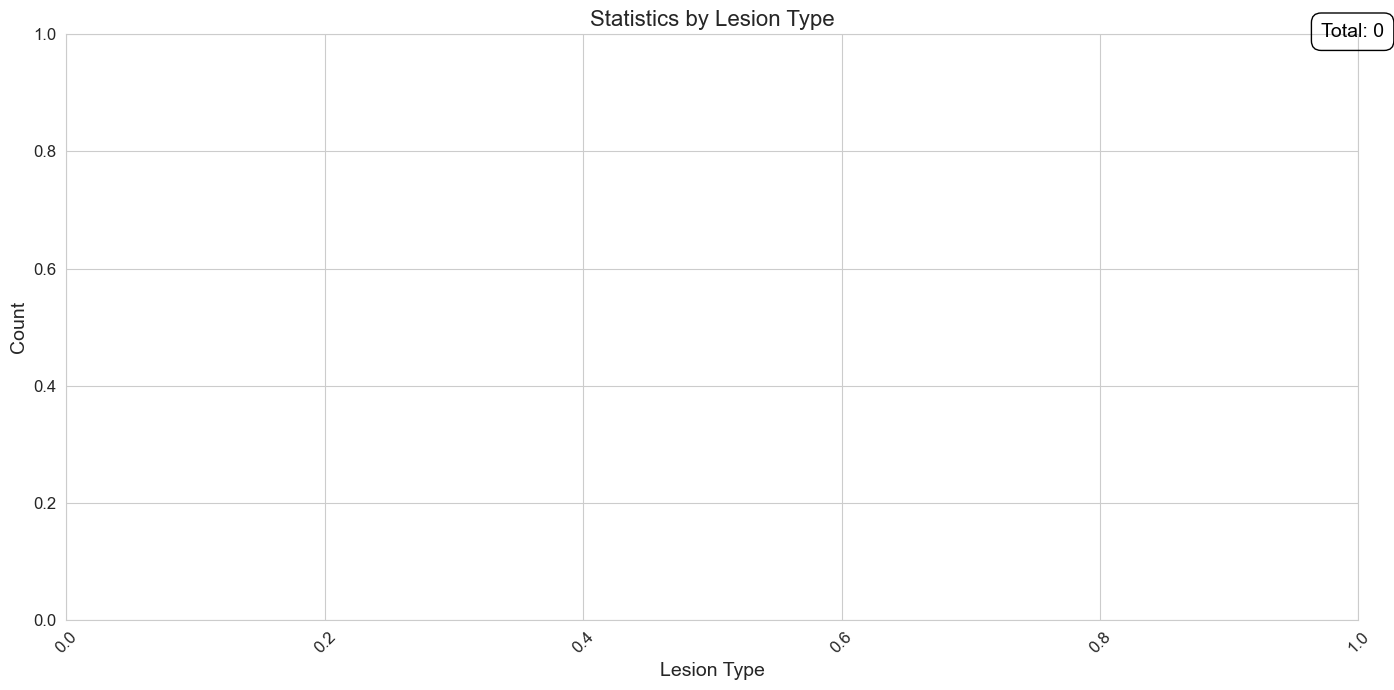

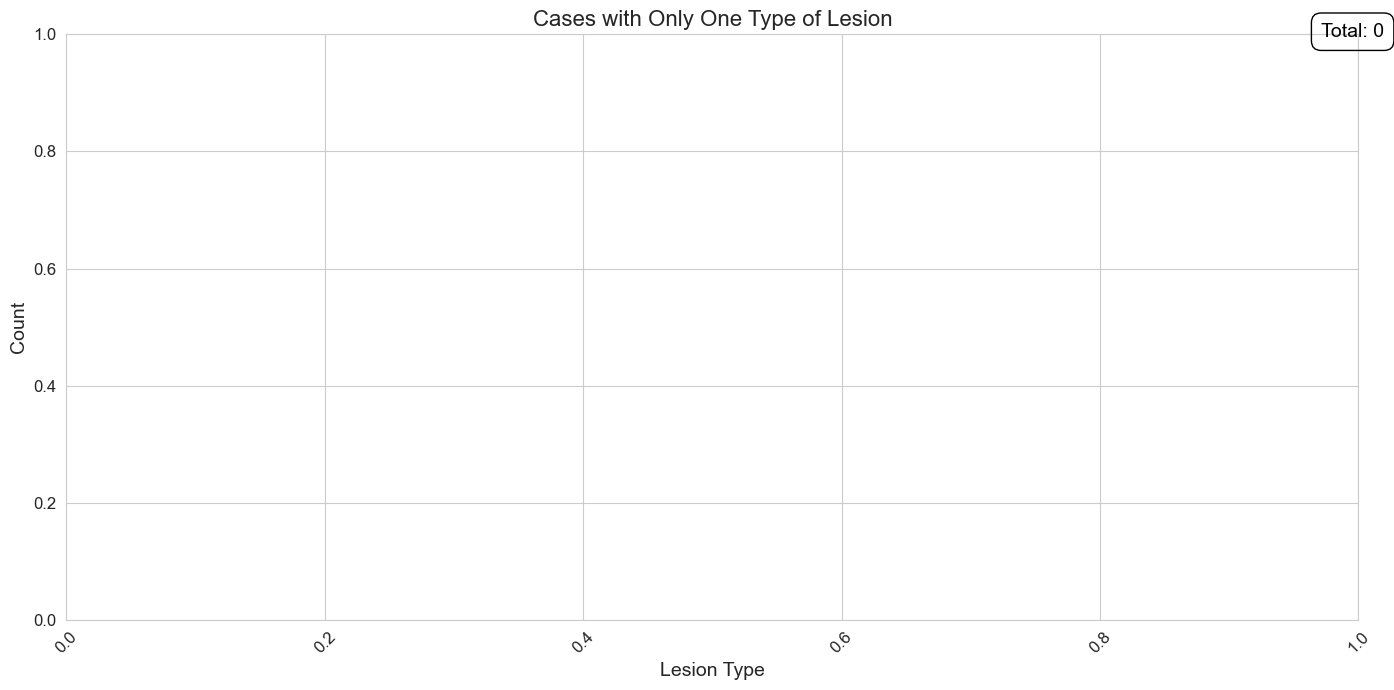

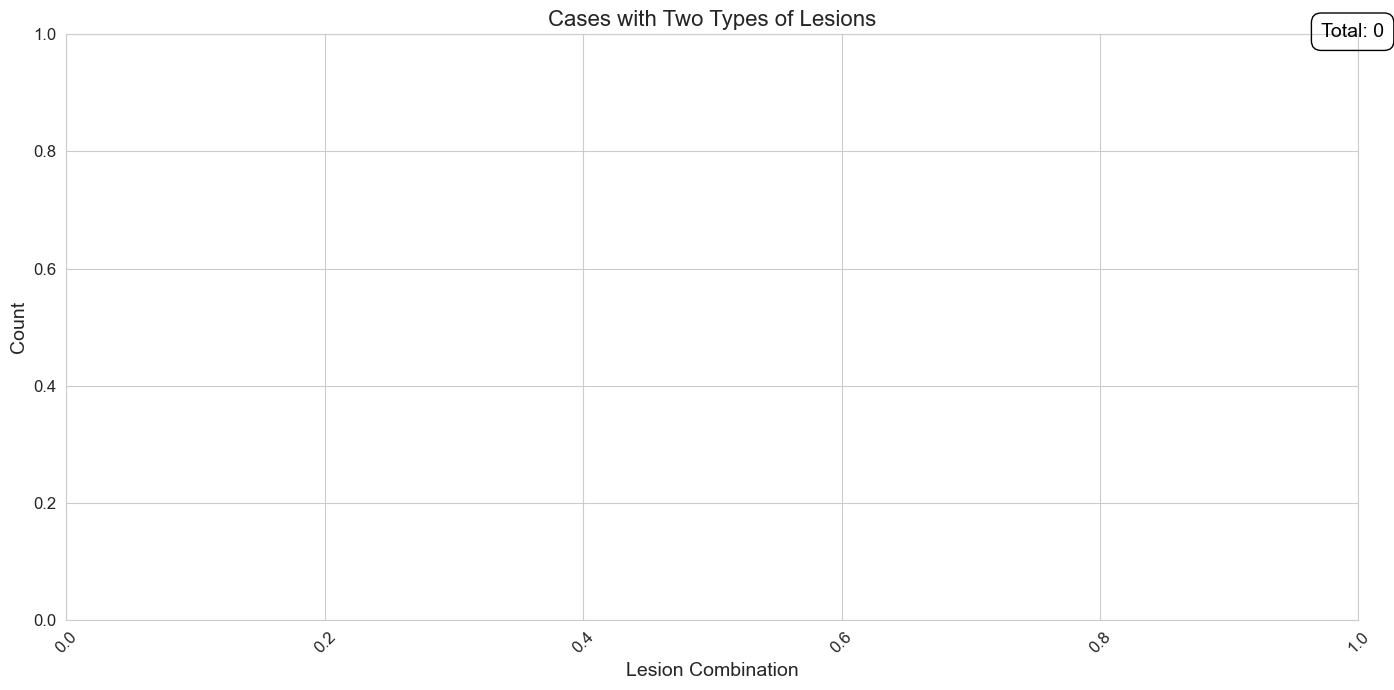

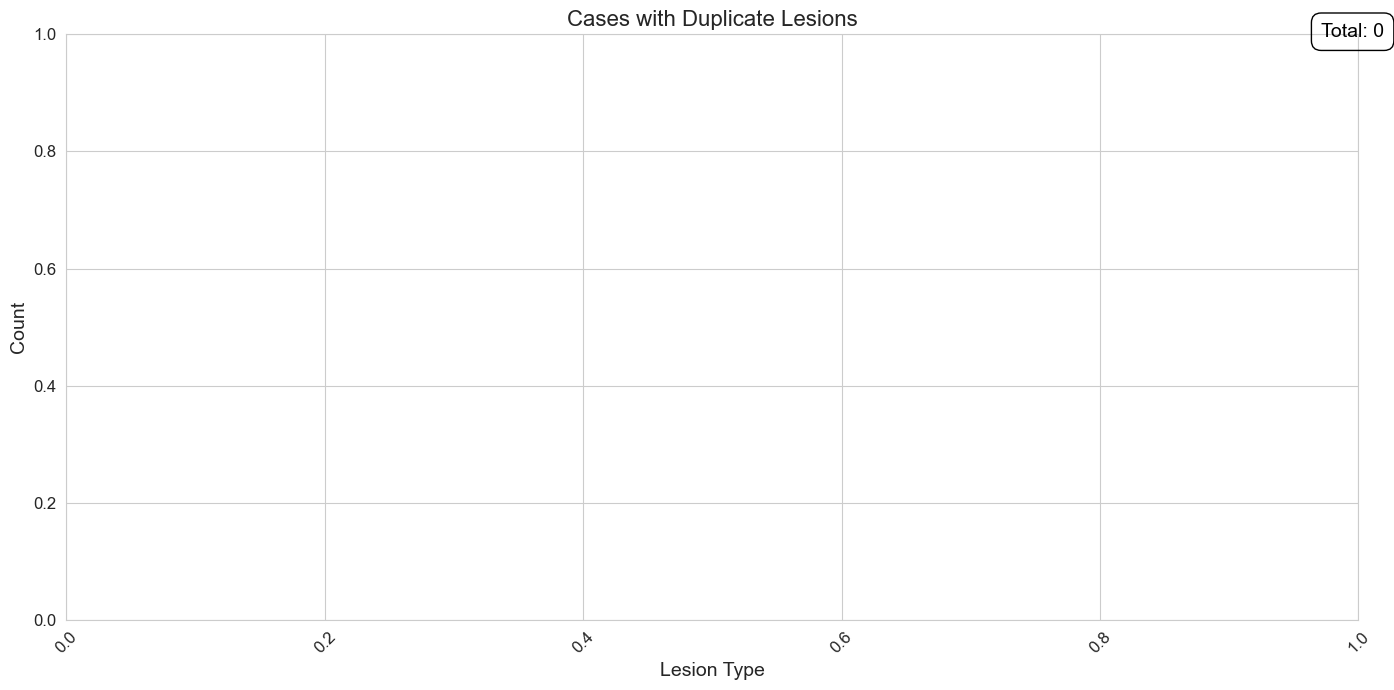

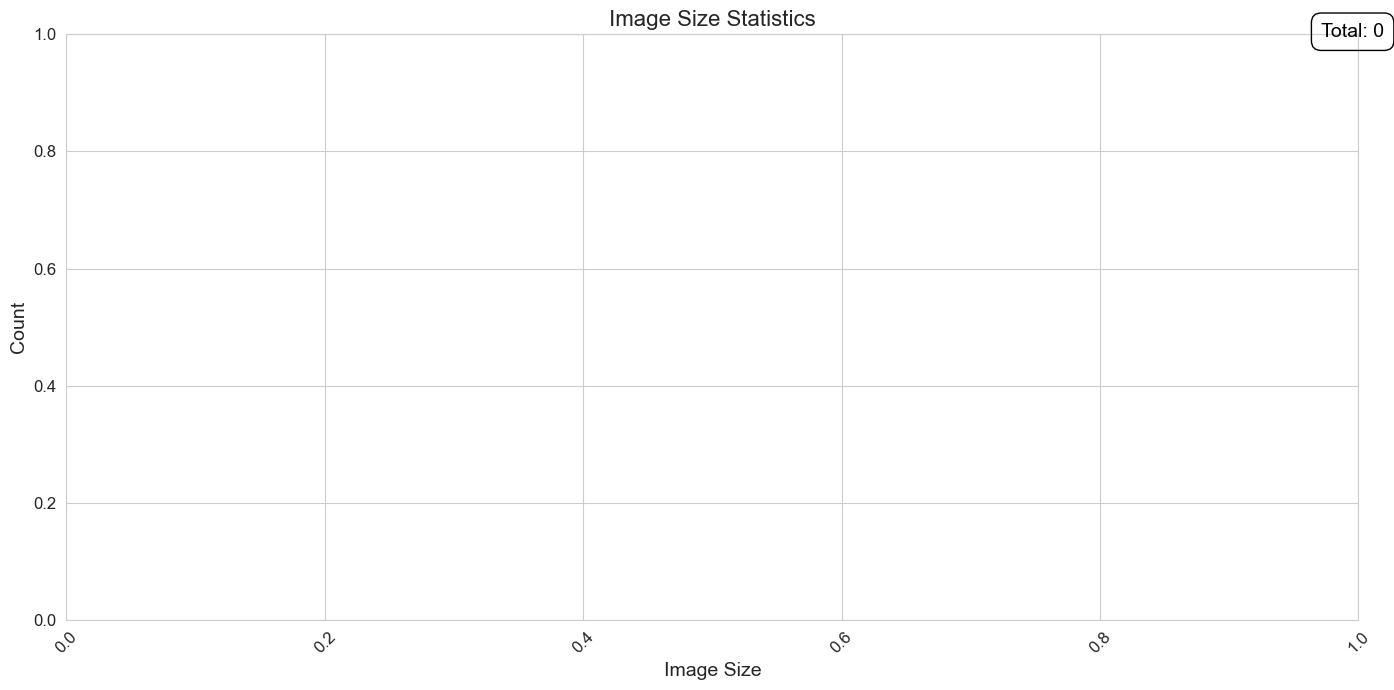

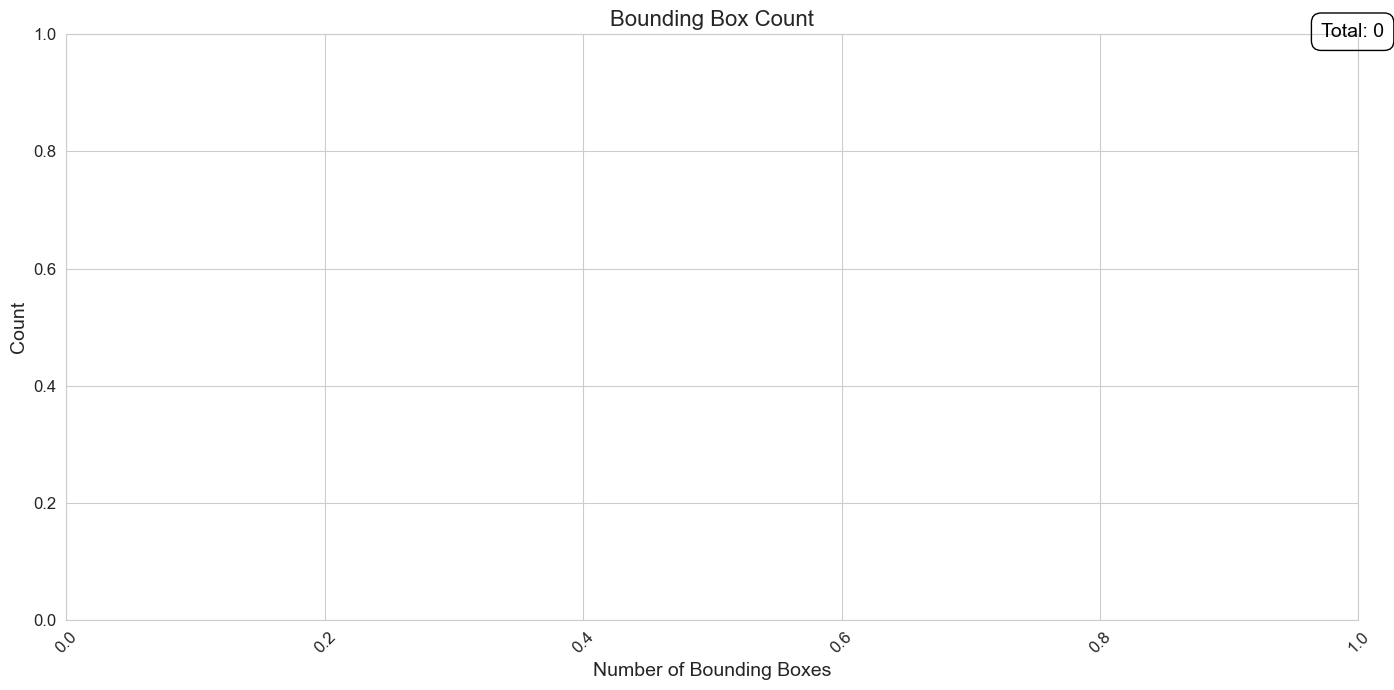

In [33]:
# seaborn 스타일 설정
sns.set_style("whitegrid")  # 그리드 스타일 설정
sns.set_palette("husl")  # 색상 팔레트 설정

def show_barplot_with_counts_and_percentages(data_items, title, xlabel, ylabel):
    # 데이터 준비
    x_values = [item[0] for item in data_items]
    y_values = [item[1] for item in data_items]
    total_count = sum(y_values)

    # 막대 그래프 생성
    plt.figure(figsize=(14, 7))
    bars = sns.barplot(x=x_values, y=y_values, palette=sns.color_palette("husl", len(x_values)))  # 컬러 팔레트 변경
    plt.title(title, fontsize=16)  # 제목의 폰트 크기 변경
    plt.xlabel(xlabel, fontsize=14)  # x축 레이블의 폰트 크기 변경
    plt.ylabel(ylabel, fontsize=14)  # y축 레이블의 폰트 크기 변경
    plt.xticks(rotation=45, fontsize=12)  # x축 틱 레이블의 폰트 크기 변경 및 회전
    plt.yticks(fontsize=12)  # y축 틱 레이블의 폰트 크기 변경

    # 각 막대에 개수와 백분율 표시
    for index, value in enumerate(y_values):
        percentage = f"{(value / total_count) * 100:.1f}%" if total_count > 0 else "N/A"
        bars.text(index, value, f"{value} ({percentage})", color='black', ha="center", fontsize=12)  # 텍스트의 폰트 크기 변경

    # 전체 합계를 우측 상단에 표시
    plt.text(1.02, 1.02, f'Total: {total_count}', ha='right', va='top',
             transform=bars.transAxes, fontsize=14, color='black',  # 텍스트의 폰트 크기 및 색상 변경
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.tight_layout()  # 레이아웃을 깔끔하게 조정
    plt.show()

# 데이터 준비
lesion_type_data = sorted(lesion_type_counts.items(), key=lambda item: item[0])
single_lesion_data = sorted(single_lesion_counts.items(), key=lambda item: item[0])
lesion_combinations_data = list(lesion_combinations_counts.items())
duplicate_lesions_data = list(duplicate_lesions_per_image.items())
image_size_data = sorted(image_sizes.items())
bounding_box_data = list(bounding_box_statistics.items())

# 각 데이터셋에 대한 막대 그래프 생성 및 표시
show_barplot_with_counts_and_percentages(lesion_type_data, 'Statistics by Lesion Type', 'Lesion Type', 'Count')
show_barplot_with_counts_and_percentages(single_lesion_data, 'Cases with Only One Type of Lesion', 'Lesion Type', 'Count')
show_barplot_with_counts_and_percentages(lesion_combinations_data, 'Cases with Two Types of Lesions', 'Lesion Combination', 'Count')
show_barplot_with_counts_and_percentages(duplicate_lesions_data, 'Cases with Duplicate Lesions', 'Lesion Type', 'Count')
show_barplot_with_counts_and_percentages(image_size_data, 'Image Size Statistics', 'Image Size', 'Count')
show_barplot_with_counts_and_percentages(bounding_box_data, 'Bounding Box Count', 'Number of Bounding Boxes', 'Count')
